#### [PREV](1.OOP_Single_Feature_Linear_Regression.ipynb) | [HOME](../README.md) | [NEXT](3.OOP_Polynomial_Liner_Regression.ipynb)

---

# OOP Multiple Feature Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Multiple Feature Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [18]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import Data And Visualise The Data

In [19]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Features variable
X_insects = insects[['continent', 'latitude', 'sex']]
# Target variable
y_insects = insects['wingsize']

insects.head()

,continent,latitude,sex,wingsize
0,1,35.5,0,901
1,1,37.0,0,896
2,1,38.6,0,906
3,1,40.7,0,907
4,1,40.9,0,898


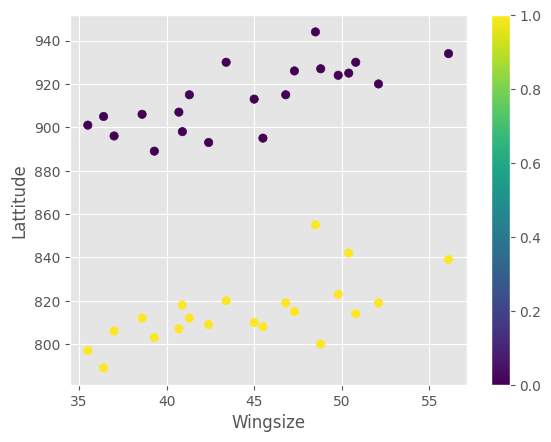

In [20]:
# Plot the data, colour coded by sex
ax = plt.scatter(insects.latitude, insects.wingsize, c=insects['sex'])
plt.xlabel("Wingsize")
plt.ylabel("Lattitude")
plt.colorbar()
plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [21]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [22]:

insects_regression.fit(X_insects, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [23]:
# Predict the target for the whole dataset
wing_size_predictions = insects_regression.predict(X_insects)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'continent': [1],
    'latitude': [40],
    'sex': [0]
})
new_insect['wingsize'] = insects_regression.predict(new_insect)
print(f"New insect is:\n{new_insect}")

New insect is:
   continent  latitude  sex    wingsize
0          1        40    0  903.740233


#### Step 5: Plot the Predictions

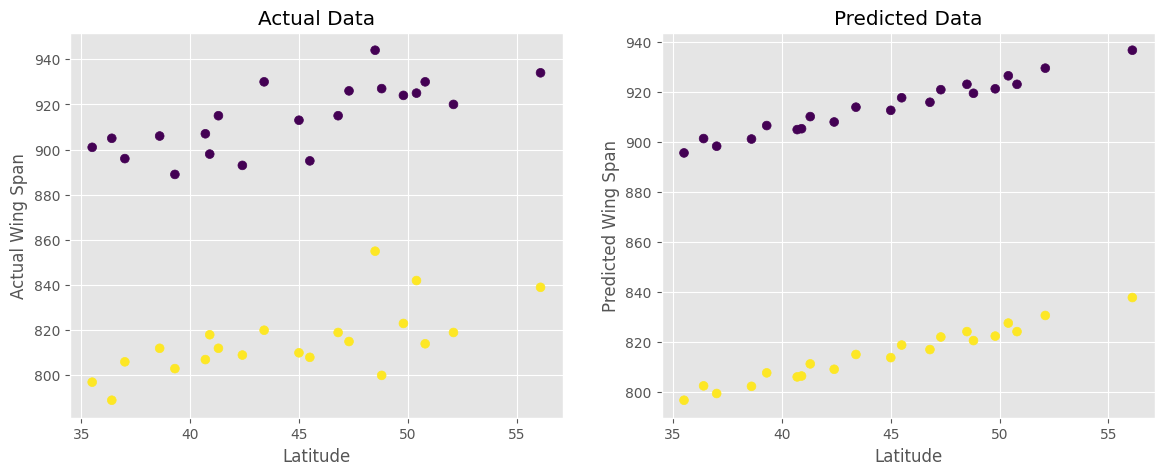

In [24]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, c=insects['sex'],  s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, c=insects['sex'], s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

plt.show()


#### Step 6: Evaluate The Model

In [ ]:
#Get Evalutative Data from the model
print(f"Model coefficient :{insects_regression.coef_}")
print(f"Model y intercept :{insects_regression.intercept_}")
print(f"Model score :{insects_regression.score(X_insects,y_insects)}")
mae = mean_absolute_error(y_true=y_insects,y_pred=wing_size_predictions) 
mse = mean_squared_error(y_true=y_insects,y_pred=wing_size_predictions)
print("MAE:",mae) 
print("MSE:",mse) 
print()


#Manually calculate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': abs(y_insects - insects_regression.predict(X_insects).round(2))
})
model_cost = (1/model_loss.shape[0]) * (model_loss['Loss'].sum() / model_loss.shape[0])

print(f"The cost of this model is {model_cost:.5f}")
print(model_loss)


Model coefficient :[ -4.12890383   1.79260932 -98.85714286]
Model y intercept :836.1647645123378
Model score :0.9585580994936529
MAE: 7.750187049787379
MSE: 110.55759329458347

The cost of this model is 0.18451
    Target  Predicted result   Loss
0      901        895.673491   5.33
1      896        898.362405   2.36
2      906        901.230580   4.77
3      907        904.995060   2.00
4      898        905.353582   7.35
5      893        908.042496  15.04
6      913        912.703280   0.30
7      915        915.929977   0.93
8      927        919.515195   7.48
9      924        921.307805   2.69
10     930        923.100414   6.90
11     905        901.415744   3.58
12     889        906.614311  17.61
13     915        910.199529   4.80
14     930        913.964009  16.04
15     895        917.728488  22.73
16     926        920.955185   5.04
17     944        923.106316  20.89
18     925        926.512274   1.51
19     920        929.559710   9.56
20     934        936.730147   2.